In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Model

import random

In [ ]:
np.random.seed(0)

In [ ]:
(X_train, y_train), (X_test, y_test)= mnist.load_data()
 
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

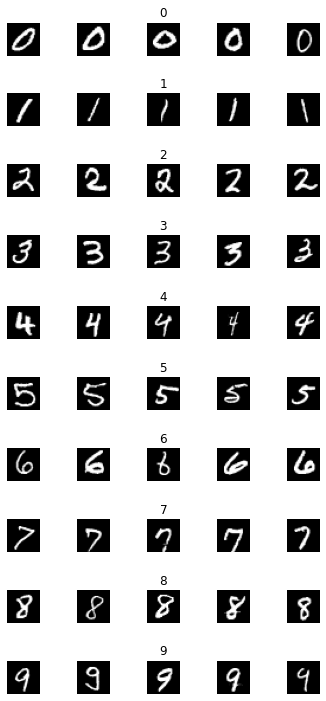

In [ ]:
num_of_samples=[]
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()
 
for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


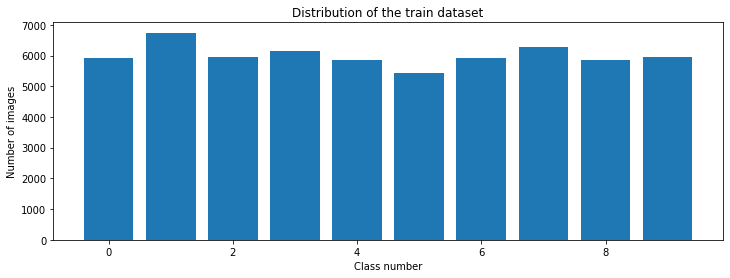

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
# define LeNet model function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape=(28,28,1),activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  # since not first layer, we do not need to specify input shape 
  model.add(Conv2D(15,(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation='relu'))
  # drop out layers typically added between layers with high numbers of parameters since high number of paramters more likely to overfit (memorize data)
  # dropout arg is its fraction rate (fraction of neurons turned off per run)
  model.add(Dropout(0.6))
  model.add(Dense(num_classes,activation='softmax'))
  model.compile(Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
model = leNet_model()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 30)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 15)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 375)               0         
                                                                 
 dense_6 (Dense)             (None, 500)              

In [ ]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1,batch_size=400,verbose=1,shuffle=1)

Epoch 1/20
135/135 [==============================] - 2s 9ms/step - loss: 0.5333 - accuracy: 0.8357 - val_loss: 0.1001 - val_accuracy: 0.9738
Epoch 2/20
135/135 [==============================] - 1s 7ms/step - loss: 0.1306 - accuracy: 0.9607 - val_loss: 0.0677 - val_accuracy: 0.9812
Epoch 3/20
135/135 [==============================] - 1s 7ms/step - loss: 0.0913 - accuracy: 0.9727 - val_loss: 0.0522 - val_accuracy: 0.9848
Epoch 4/20
135/135 [==============================] - 1s 7ms/step - loss: 0.0717 - accuracy: 0.9784 - val_loss: 0.0471 - val_accuracy: 0.9872
Epoch 5/20
135/135 [==============================] - 1s 7ms/step - loss: 0.0591 - accuracy: 0.9819 - val_loss: 0.0412 - val_accuracy: 0.9887
Epoch 6/20
135/135 [==============================] - 1s 7ms/step - loss: 0.0525 - accuracy: 0.9836 - val_loss: 0.0400 - val_accuracy: 0.9893
Epoch 7/20
135/135 [==============================] - 1s 7ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0387 - val_accuracy: 0.9893
Epoch 

Text(0.5, 0, 'epoch')

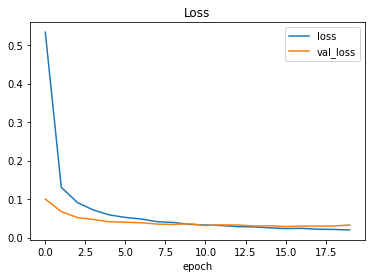

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

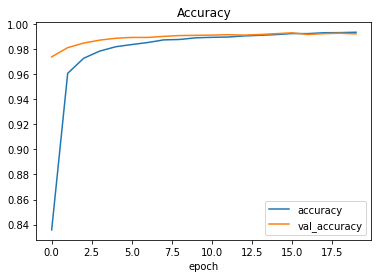

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [ ]:
# Test set
score = model.evaluate(X_test, y_test, verbose=0)
print("Test score:", score[0])
print("Accuracy:", score[1])

Test score: 0.019635606557130814
Accuracy: 0.9937999844551086


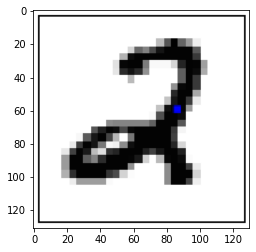

In [ ]:
import requests
# PIL - Python Image Library
from PIL import Image
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url,stream=True)
# print(response) - if prints 200, good connection
img = Image.open(response.raw)
plt.imshow(img)

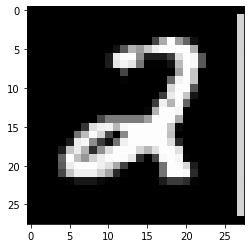

In [ ]:
import cv2 # anything to do with computer vision in python use cv2
img_array = np.asarray(img)
img = cv2.resize(img_array,(28,28))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img,cmap=plt.get_cmap('gray'))

In [ ]:
img = img/255
img = img.reshape(1,28,28,1)

In [ ]:
prediction = np.argmax(model.predict(img), axis =-1 )
print('prediction: ', str(prediction))

1/1 [==============================] - 0s 56ms/step
prediction:  [2]


In [ ]:
layer1 = Model(inputs=model.layers[0].input, outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input, outputs=model.layers[2].output)

In [ ]:
visual_layer1, visual_layer2 = layer1.predict(img), layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

1/1 [==============================] - 0s 40ms/step
(1, 24, 24, 30)
(1, 10, 10, 15)


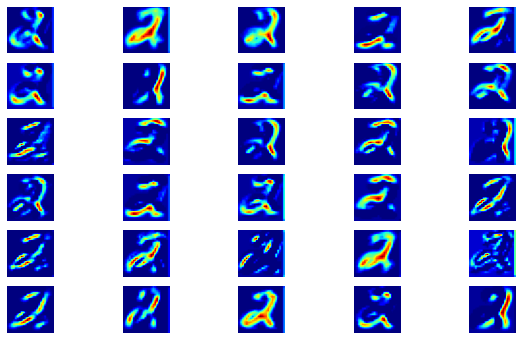

In [ ]:
#layer 1
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')

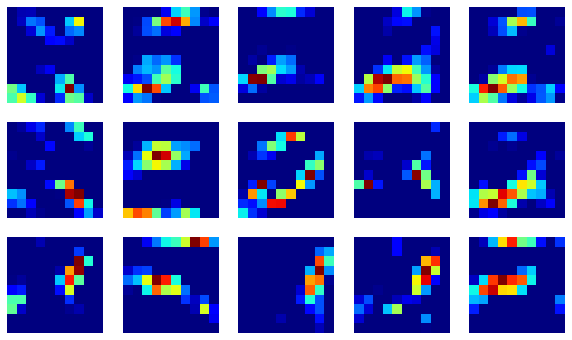

In [ ]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')